<a href="https://colab.research.google.com/github/YuvrajS2003/EDA-Theory-DA-21BDS0259/blob/main/21BDS0259.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Theory DA

# Name:- YUVRAJ SINGH
# Reg No:- 21BDS0259

# Github URL:- https://github.com/YuvrajS2003

Dataset Dimensions:  (5885, 53)

Column Names:
 ['classe', 'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt', 'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x', 'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x', 'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell', 'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y', 'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y', 'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y', 'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm', 'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z']

Data Types:
 classe                   

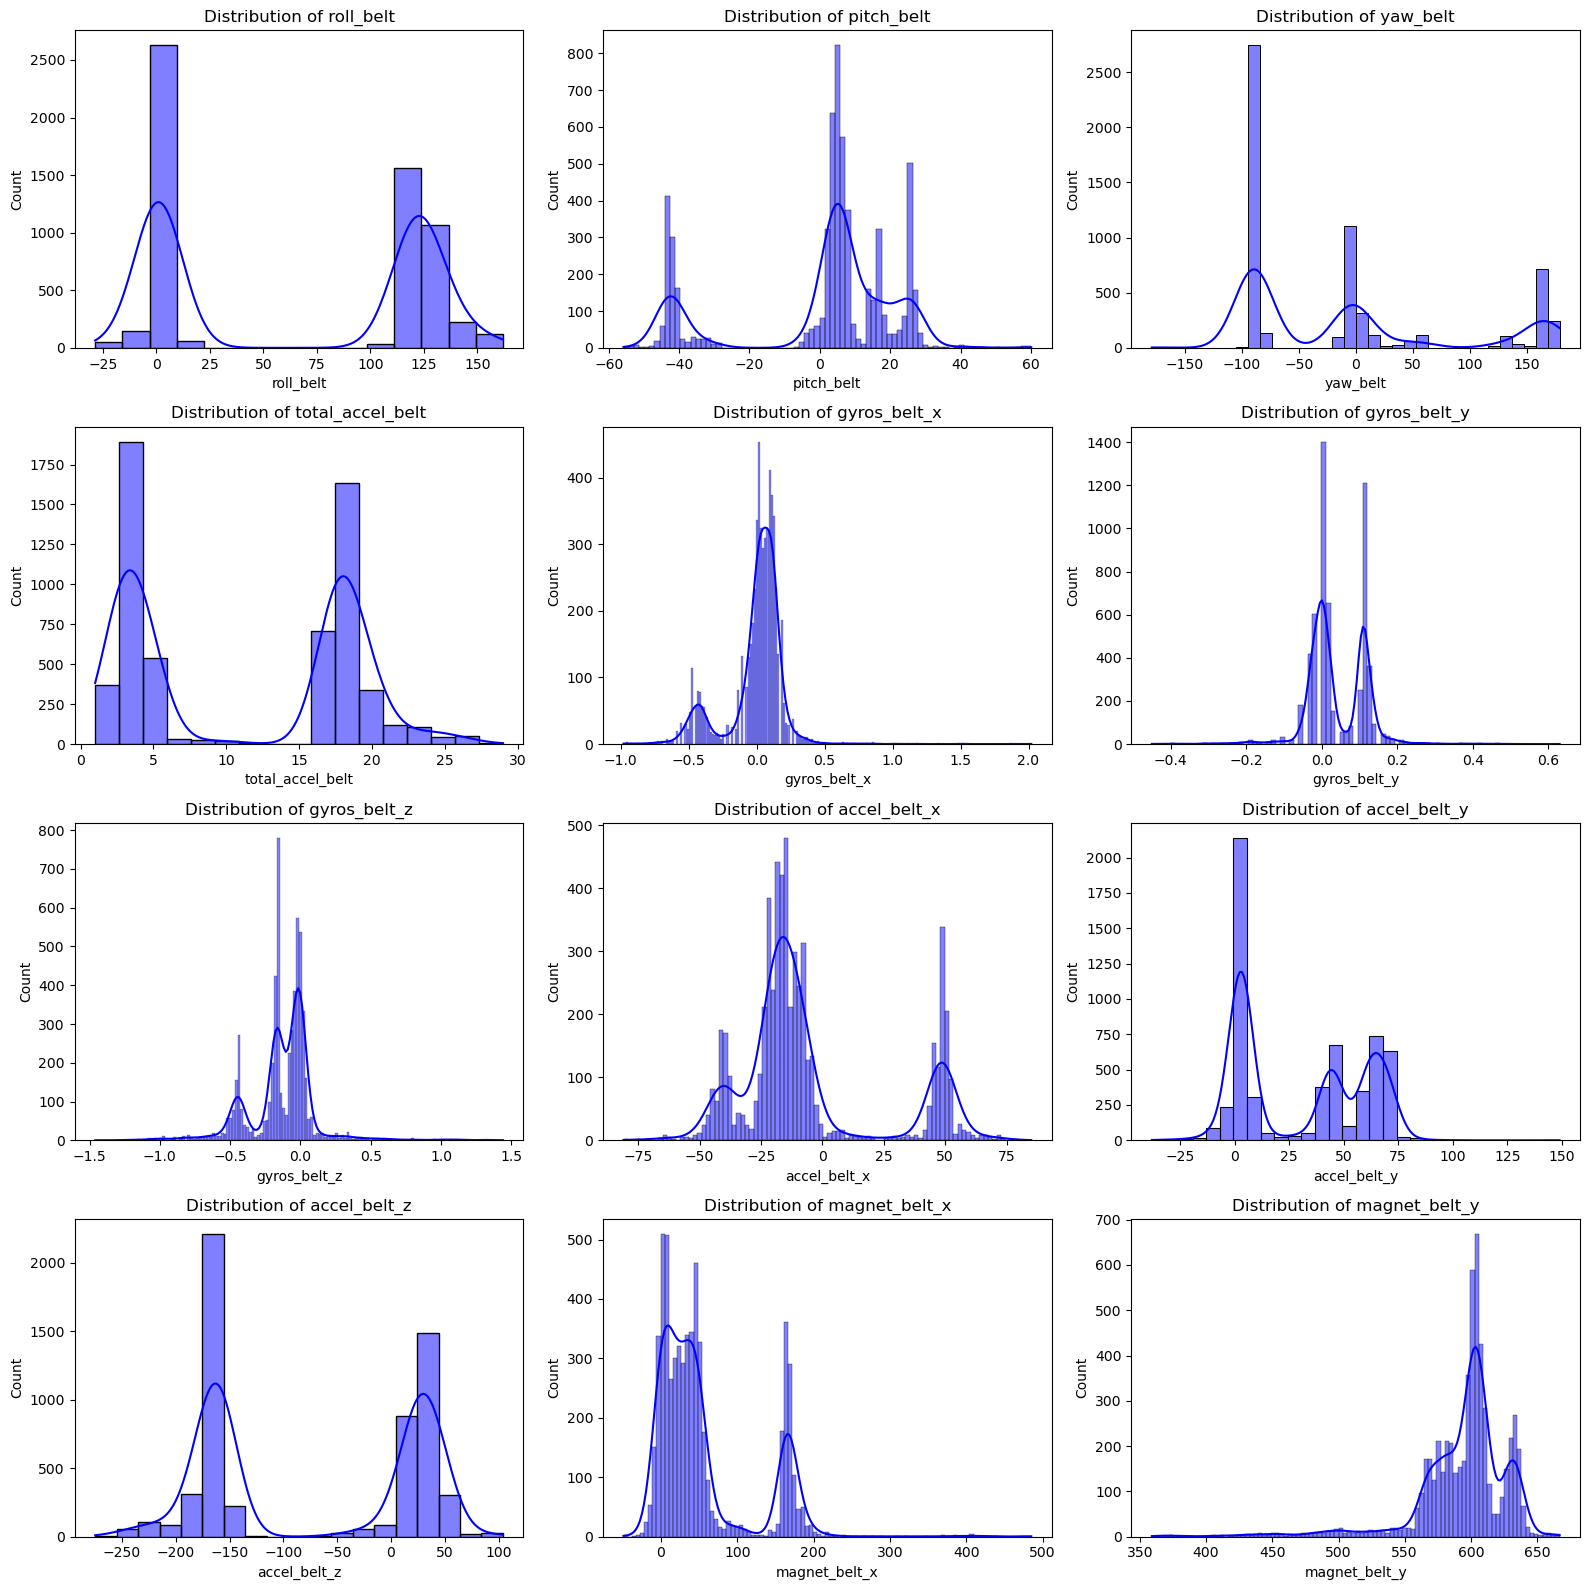

C:\Users\yuvi6\AppData\Local\Temp\ipykernel_8848\3552146835.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='classe', palette='viridis')


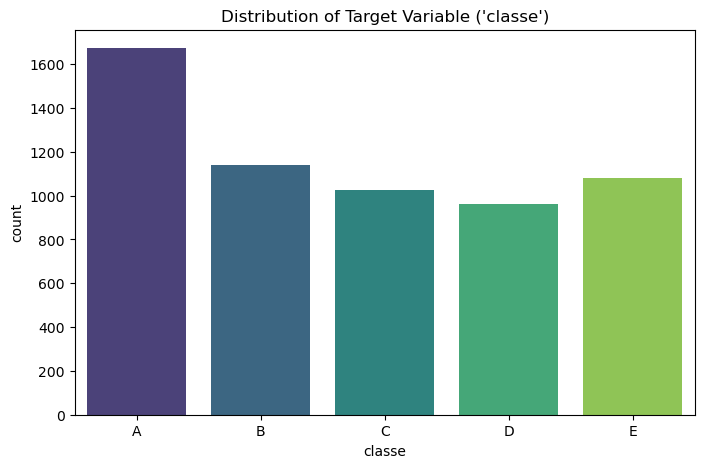

C:\Users\yuvi6\AppData\Local\Temp\ipykernel_8848\3552146835.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=column, data=dataframe, ax=axes[i], palette='viridis')
C:\Users\yuvi6\AppData\Local\Temp\ipykernel_8848\3552146835.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=column, data=dataframe, ax=axes[i], palette='viridis')
C:\Users\yuvi6\AppData\Local\Temp\ipykernel_8848\3552146835.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=column, data=dataframe, ax=axes[i], palette='virid

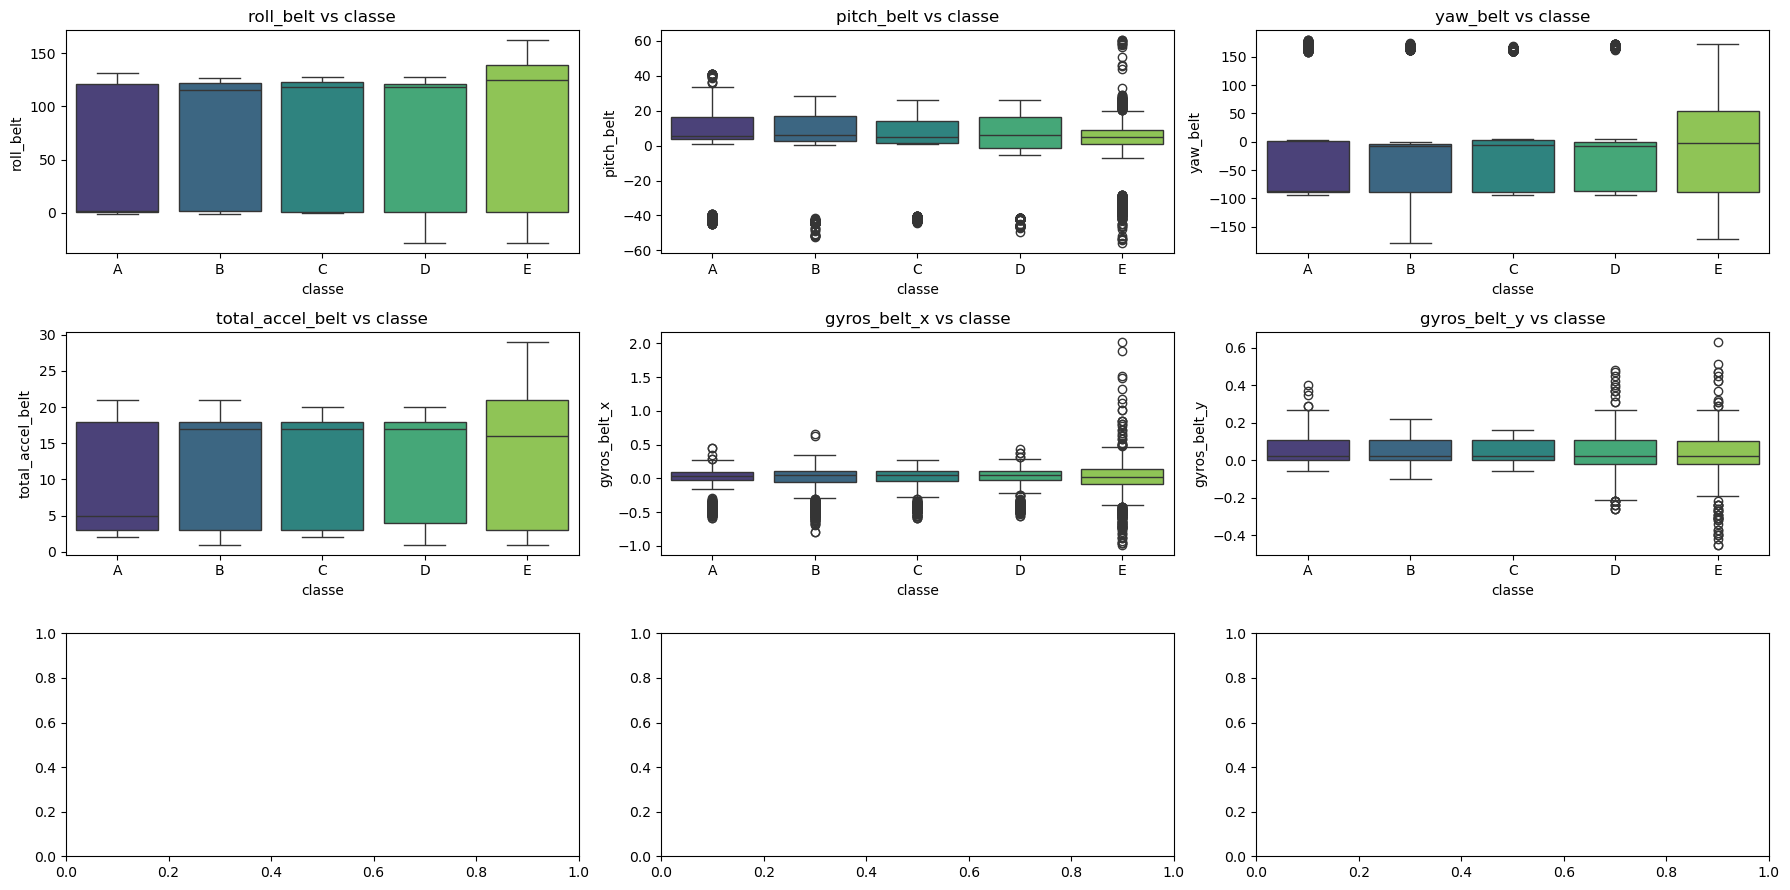

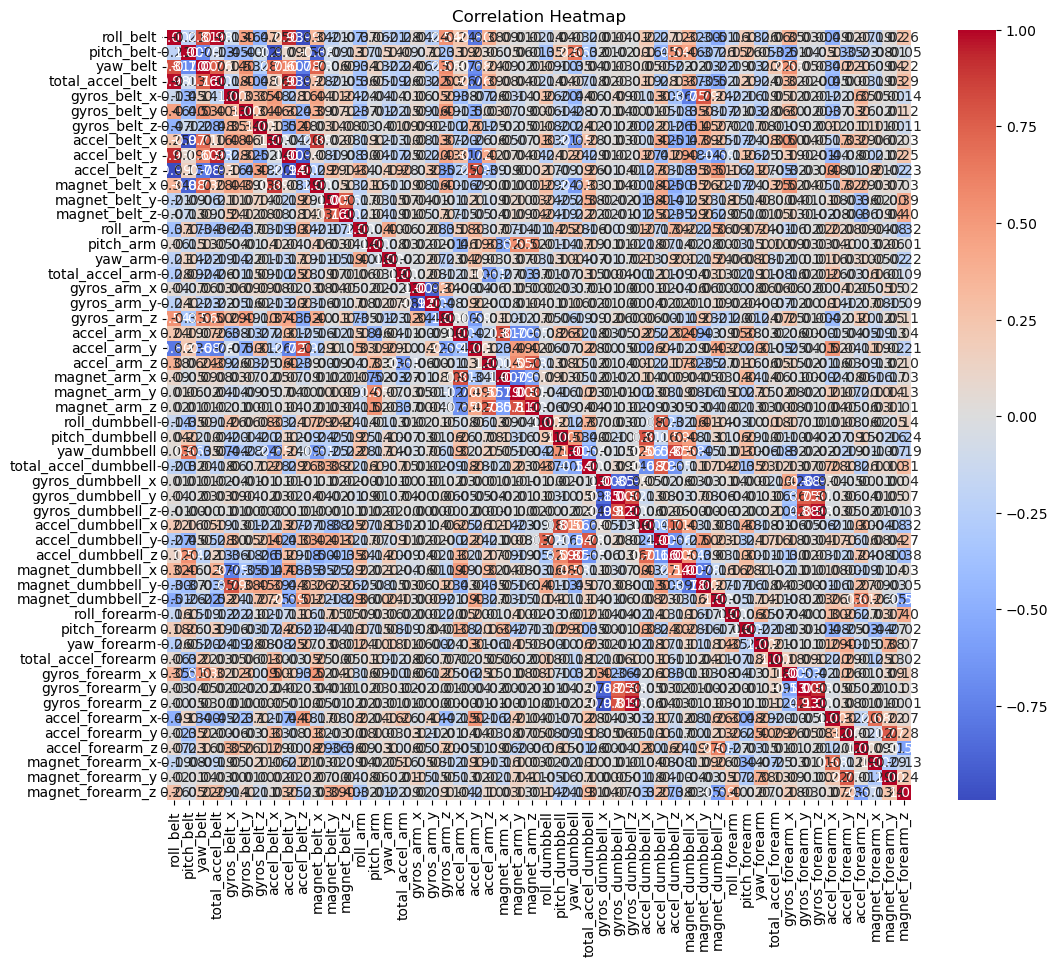

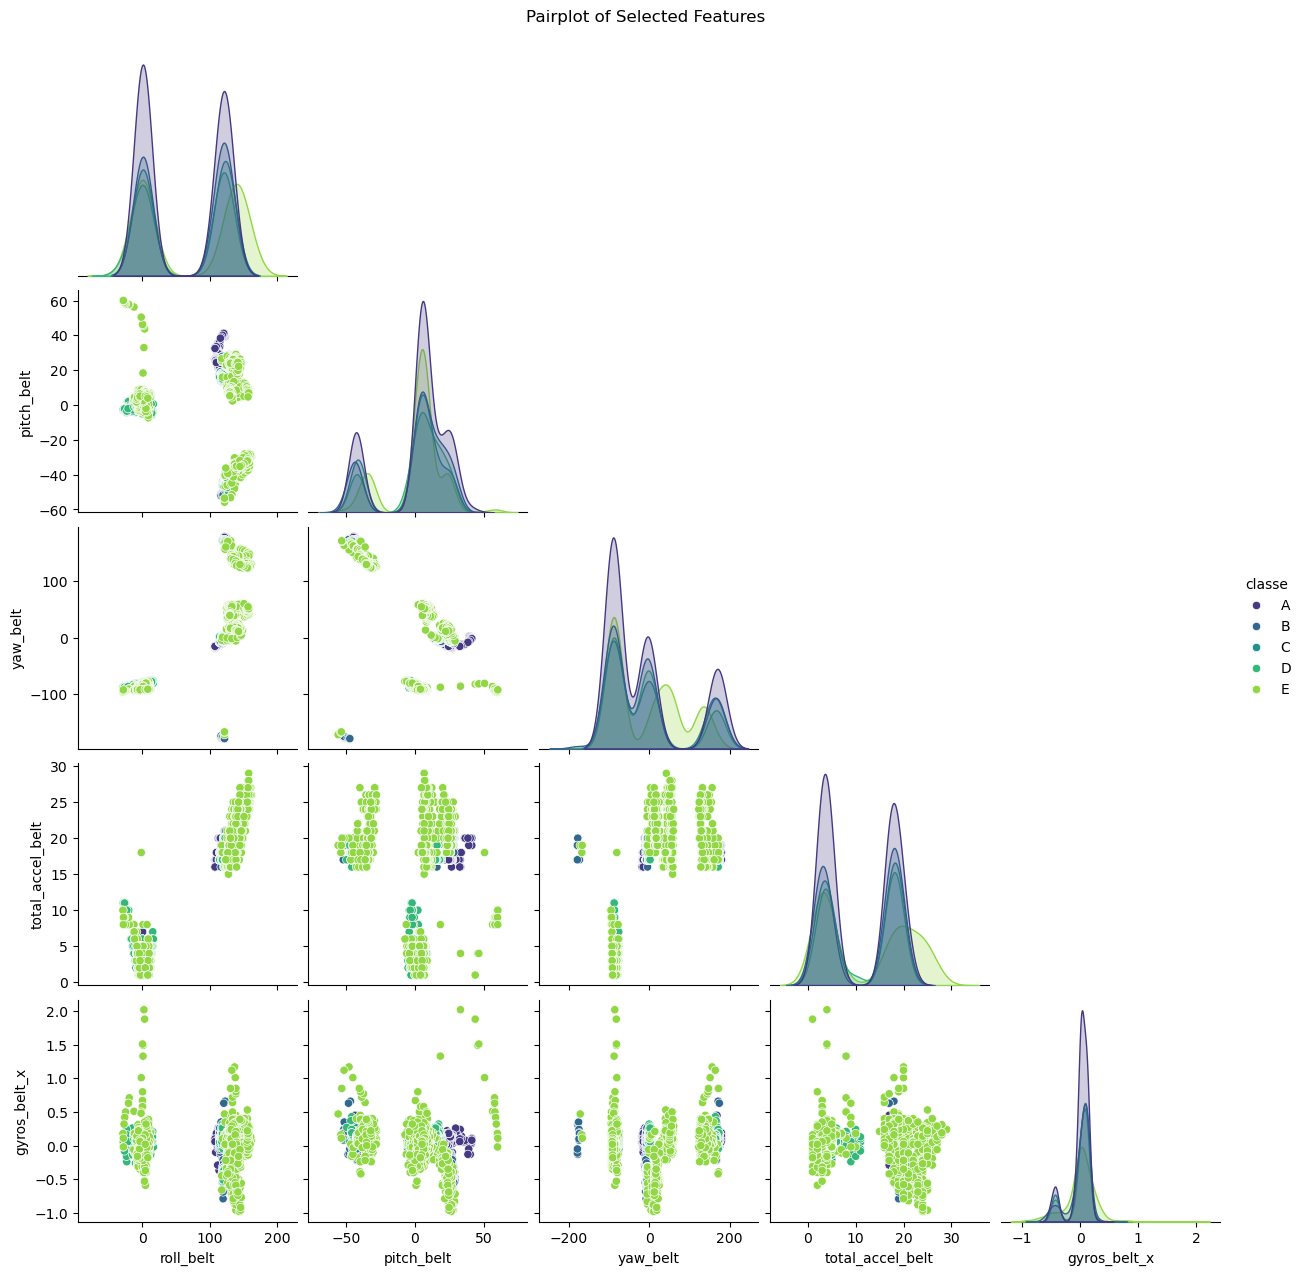

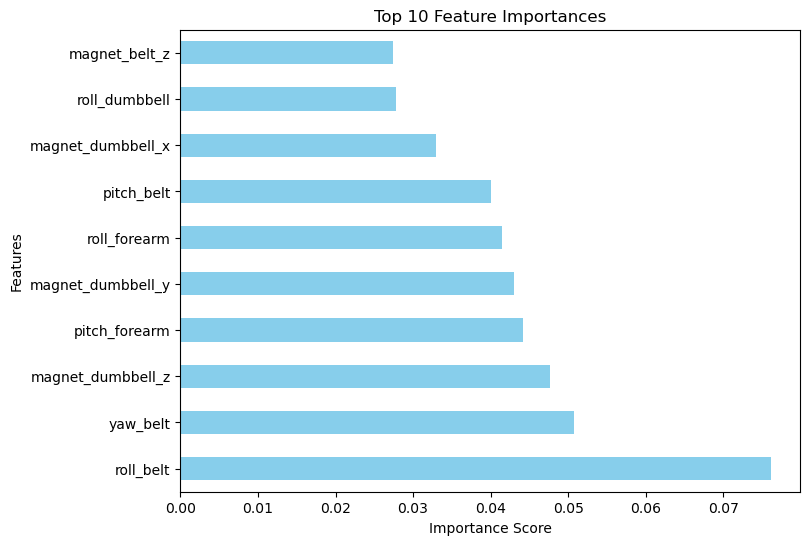

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'har_validate.csv'  # Change the path if needed
data = pd.read_csv(file_path)

# 1. Dimensions and Summary
print("Dataset Dimensions: ", data.shape)
print("\nColumn Names:\n", data.columns.tolist())
print("\nData Types:\n", data.dtypes)
print("\nFirst Few Rows:\n", data.head())
print("\nSummary Statistics:\n", data.describe(include='all'))

# 2. Data Handling
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values Per Column:\n", missing_values[missing_values > 0])

# Drop columns or rows with too many missing values (if necessary)
# Example: data = data.dropna(axis=1)  # Drops columns with missing values

# 3. Data Cleaning
# Check for duplicate rows
duplicates = data.duplicated().sum()
print("\nNumber of Duplicate Rows: ", duplicates)

# Drop duplicates (if any)
data = data.drop_duplicates()

# 4. Univariate Analysis
# Plot histograms for numeric columns
def plot_histograms(dataframe, columns, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
    axes = axes.flatten()
    for i, column in enumerate(columns):
        sns.histplot(dataframe[column], kde=True, ax=axes[i], color='blue')
        axes[i].set_title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
plot_histograms(data, numeric_cols[:12], 4, 3)  # Plot first 12 columns

# Plot target variable 'classe'
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='classe', palette='viridis')
plt.title("Distribution of Target Variable ('classe')")
plt.show()

# 5. Bivariate Analysis
# Boxplots for numeric columns vs target variable
def plot_boxplots(dataframe, columns, target_col):
    fig, axes = plt.subplots(len(columns) // 3 + 1, 3, figsize=(18, len(columns) * 1.5))
    axes = axes.flatten()
    for i, column in enumerate(columns):
        sns.boxplot(x=target_col, y=column, data=dataframe, ax=axes[i], palette='viridis')
        axes[i].set_title(f'{column} vs {target_col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(data, numeric_cols[:6], 'classe')  # Boxplots for first 6 columns

# Correlation Heatmap
plt.figure(figsize=(12, 10))
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 6. Multivariate Analysis
# Pairplot for selected numeric columns
sns.pairplot(data, vars=numeric_cols[:5], hue='classe', palette='viridis', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# Feature Importance using Random Forest
# Encode target variable
le = LabelEncoder()
data['classe_encoded'] = le.fit_transform(data['classe'])

# Fit a Random Forest for feature importance
X = data[numeric_cols]
y = data['classe_encoded']
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=numeric_cols)
importances.nlargest(10).plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
